In [1]:
import sys
sys.path.append('../..')

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread
import cv2

from gen.load_data import load_data
from gen.datagen import oversample_generator_from_df


/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../../data')


In [4]:
train_df.head()

image                   id  \
0  ../../data/Train/CameraRGB/episode_0002_000287...  episode_0002_000287   
1  ../../data/Train/CameraRGB/episode_0008_000112...  episode_0008_000112   
2                 ../../data/Train/CameraRGB/804.png                  804   
3  ../../data/Train/CameraRGB/episode_0008_000286...  episode_0008_000286   
4               ../../data/Train/CameraRGB/M2-25.png                M2-25   

                                               label  
0  ../../data/Train/CameraSeg/episode_0002_000287...  
1  ../../data/Train/CameraSeg/episode_0008_000112...  
2                 ../../data/Train/CameraSeg/804.png  
3  ../../data/Train/CameraSeg/episode_0008_000286...  
4               ../../data/Train/CameraSeg/M2-25.png

In [5]:
valid_df.head()

image                   id  \
0               ../../data/Valid/CameraRGB/00019.png                00019   
1  ../../data/Valid/CameraRGB/episode_0005_000117...  episode_0005_000117   
2               ../../data/Valid/CameraRGB/00413.png                00413   
3               ../../data/Valid/CameraRGB/00035.png                00035   
4               ../../data/Valid/CameraRGB/00264.png                00264   

                                               label  
0               ../../data/Valid/CameraSeg/00019.png  
1  ../../data/Valid/CameraSeg/episode_0005_000117...  
2               ../../data/Valid/CameraSeg/00413.png  
3               ../../data/Valid/CameraSeg/00035.png  
4               ../../data/Valid/CameraSeg/00264.png

In [6]:
test_df.head()

image                   id  \
0  ../../data/Test/CameraRGB/episode_0008_000112.png  episode_0008_000112   
1                ../../data/Test/CameraRGB/00019.png                00019   
2  ../../data/Test/CameraRGB/episode_0012_000130.png  episode_0012_000130   
3  ../../data/Test/CameraRGB/episode_0010_000160.png  episode_0010_000160   
4                ../../data/Test/CameraRGB/00413.png                00413   

                                               label  
0  ../../data/Test/CameraSeg/episode_0008_000112.png  
1                ../../data/Test/CameraSeg/00019.png  
2  ../../data/Test/CameraSeg/episode_0012_000130.png  
3  ../../data/Test/CameraSeg/episode_0010_000160.png  
4                ../../data/Test/CameraSeg/00413.png

In [41]:
from gen.generators import gen_func, preprocess_label
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 12

# img_gen_args = dict(samplewise_center=False, 
#                               samplewise_std_normalization=False, 
#                               horizontal_flip = True, 
#                               vertical_flip = False, 
#                               height_shift_range = 0.1, 
#                               width_shift_range = 0.1, 
#                               rotation_range = 3, 
#                               shear_range = 0.01,
#                               fill_mode = 'constant',
#                               zoom_range = 0.05)

rgb_gen = ImageDataGenerator()
lab_gen = ImageDataGenerator()

train_gen = gen_func(train_df, rgb_gen, lab_gen, image_size=(600, 800), target_size=(416, 544), batch_size = BATCH_SIZE, perturb=True)
valid_gen = gen_func(valid_df, rgb_gen, lab_gen, image_size=(600, 800), target_size=(416, 544), batch_size = BATCH_SIZE)

In [42]:
def plot_next_batch(gen):
    X, Y = next(gen)

    sample_rows = 12
    fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
    for (ax1, ax2), rgb_img, lab_img in zip(m_axs, X, Y):
        img = np.clip(rgb_img+170, 0, 255).astype(np.uint8)
        print(np.unique(lab_img))
        lab_img = np.clip(lab_img, 0, 255).astype(np.uint8)
        ax1.imshow(img)
        ax1.set_title('Color')
        ax2.imshow(lab_img[:, :, :].astype(np.uint8)*255)
        ax2.set_title('Labels')


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


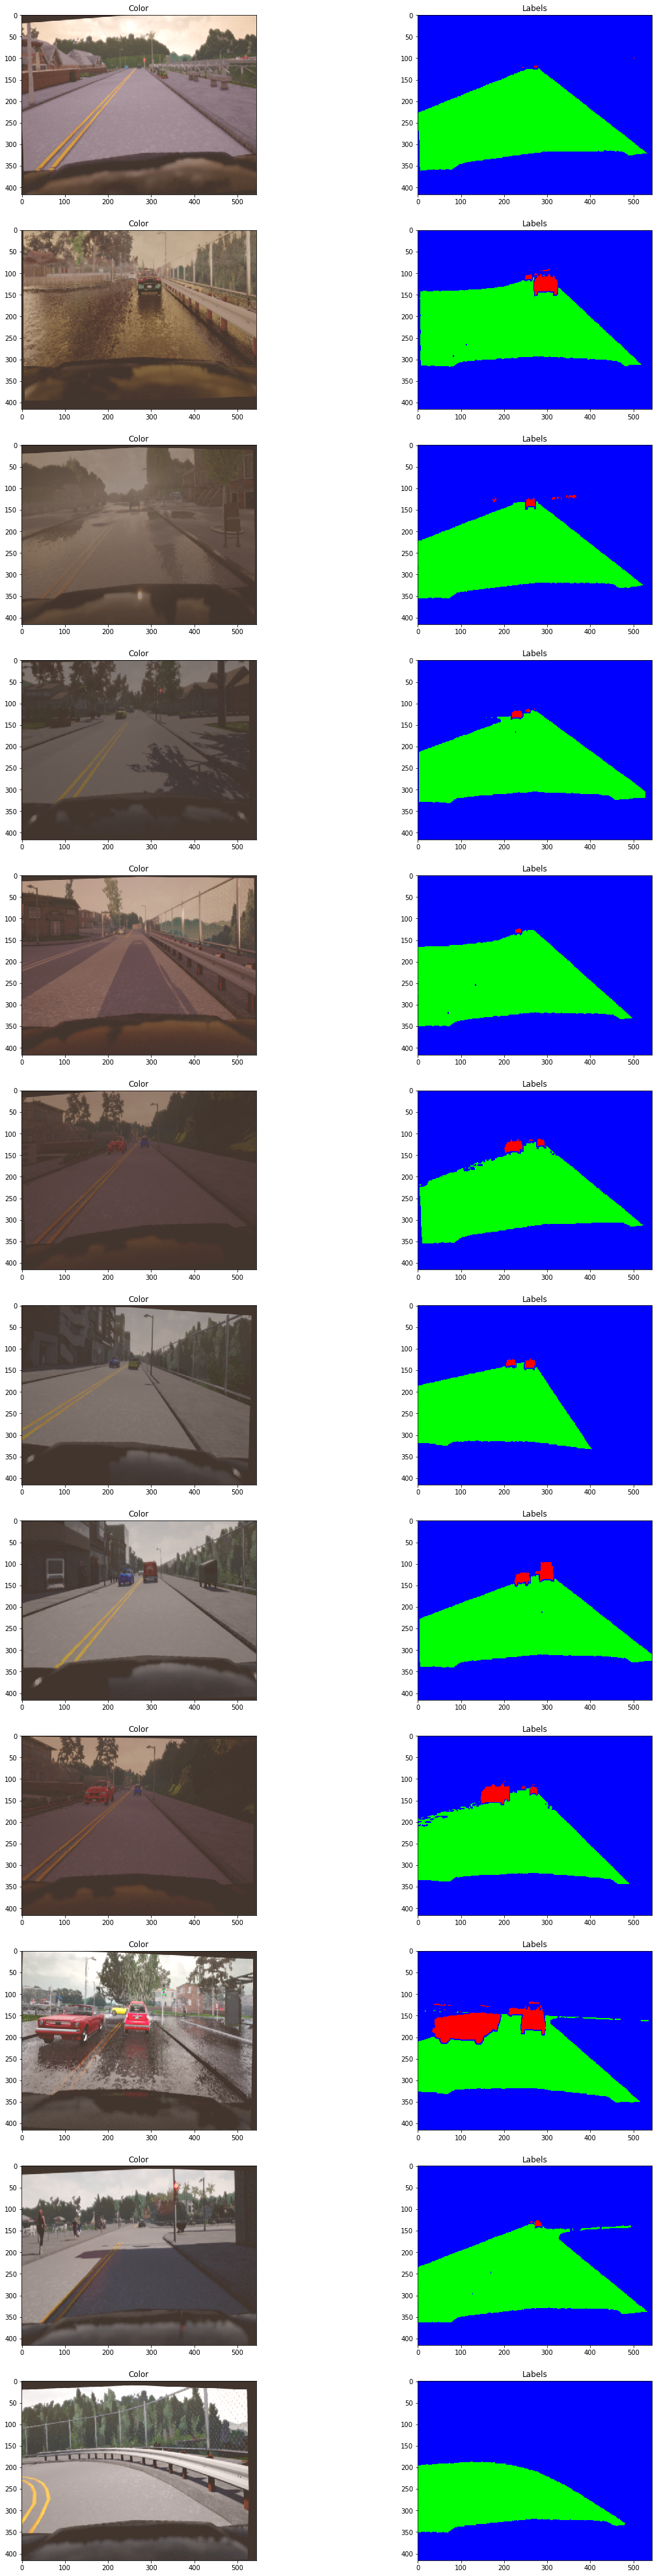

In [44]:
plot_next_batch(train_gen)

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


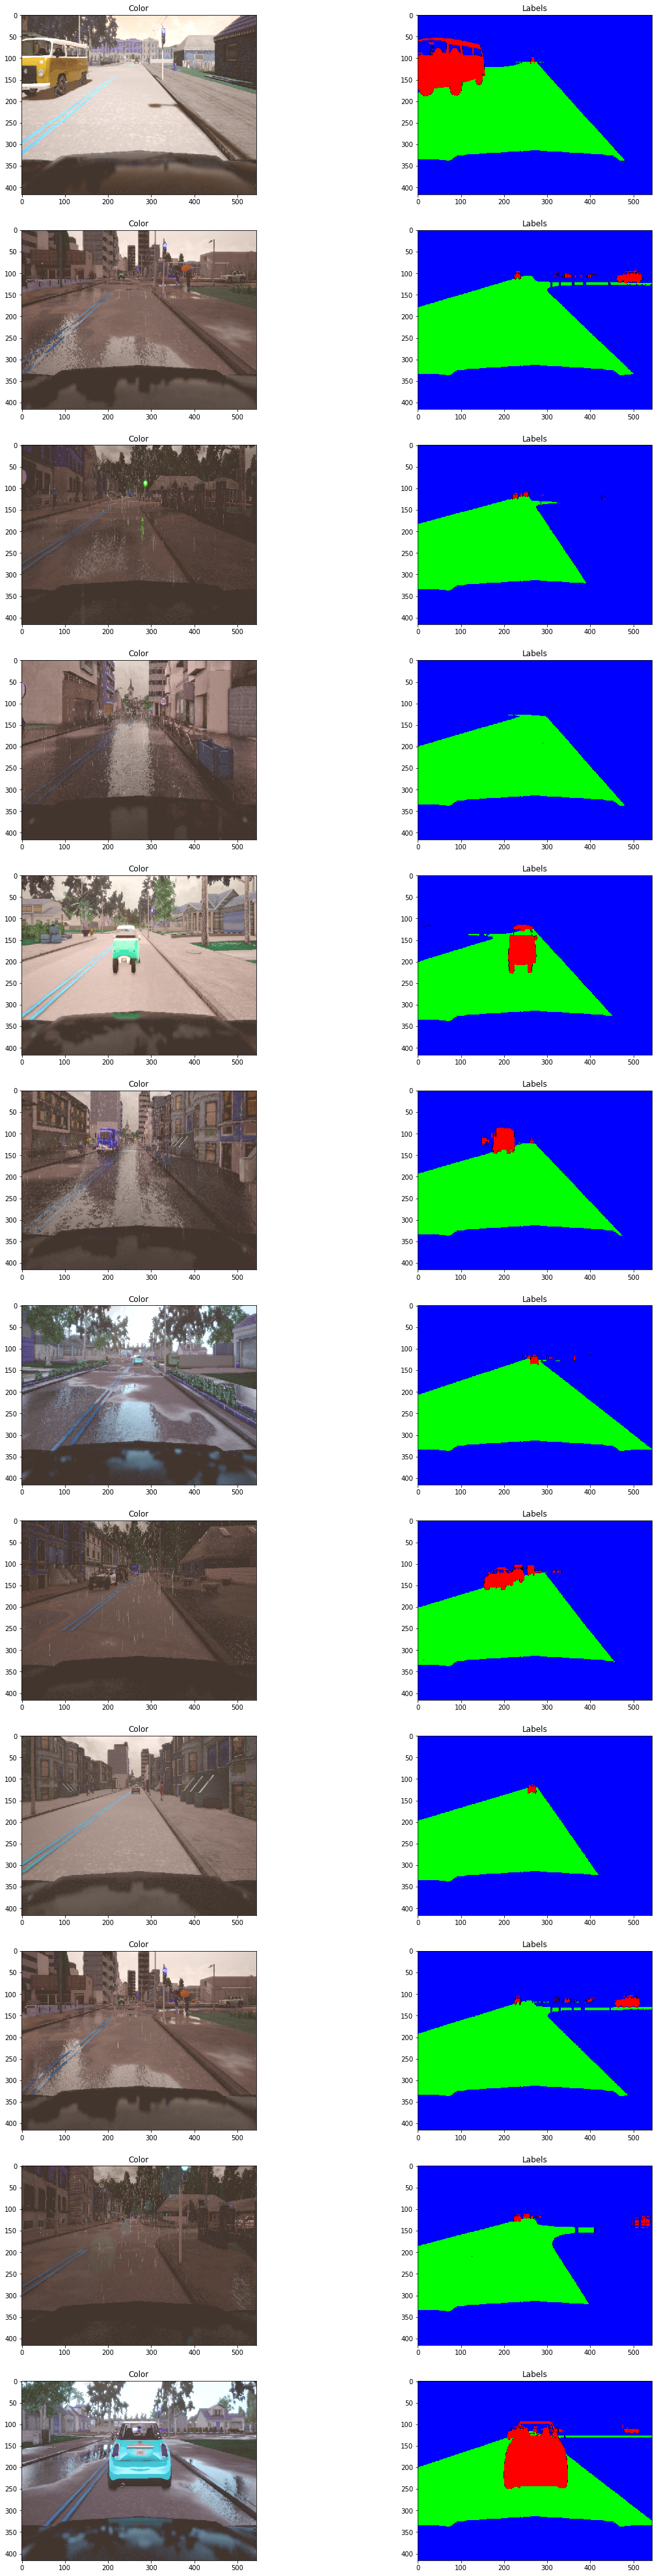

In [46]:
plot_next_batch(valid_gen)

In [ ]:

from gen.generators import preprocess_label

bg, road, cars = 0, 0, 0
for i, row in train_df.sample(2500).iterrows():
    l = preprocess_label(imread(row['label']))
    
    cars += l[:, :, 0].nonzero()[1].shape[0]
    road += l[:, :, 1].nonzero()[1].shape[0]
    bg   += l[:, :, 2].nonzero()[1].shape[0]

print (bg, road, cars)

t = bg + road + cars
car_p = cars/t
road_p = road/t
bg_p = bg/t

In [ ]:
print ("Car {}%, Road {}%, BG {}%".format(car_p, road_p, bg_p))

In [ ]:
t = cars+bg+road
p_car = t/cars
p_road = t/road
p_bg = t/bg

print(p_car, p_road, p_bg)

In [ ]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(cv2.cvtColor(r_rgb_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')